In [2]:
### インポート

# 数値・確率計算
import pandas as pd
import numpy as np
import scipy.stats as stats

# PyMC
import pymc as pm
import pytensor.tensor as pt
import arviz as az

# 描画
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import japanize_matplotlib
import seaborn as sns
import arviz as az
# plt.rcParams['font.family'] = 'Meiryo'

# ワーニング表示の抑制
import warnings
warnings.simplefilter('ignore')

print(f"{pm.__version__=}")

pm.__version__='5.16.2'


# 今回用いるデータ
- `data-attendance-2.txt`
    - `PersonID`: 学生のID（今回の分析では使わず、次から）
    - `M`: ３ヶ月間における履修登録した科目の総授業回数
    - `Y`：実際に出席した回数
    - `Score`: 学問への興味の強さ
    - `A`: アルバイト好きかどうか

# 解析の目的
前回とほぼ同じ。AとScoreで応答変数がどれほど予測できるか？知りたい。  
また、AとScoreが出席率（ratio=Y/M）にどれほど影響しているか？

In [3]:
### データの読み込み ◆データファイル5.1 data-attendance-2.txtの構成

data = pd.read_csv('./input/data-attendance-2.txt')
data["ratio"] = data["Y"] / data["M"]
print('data.shape: ', data.shape)
display(data.head())

data.shape:  (50, 6)


,PersonID,A,Score,M,Y,ratio
0,1,0,69,43,38,0.883721
1,2,1,145,56,40,0.714286
2,3,0,125,32,24,0.750000
3,4,1,86,45,33,0.733333
4,5,1,158,33,23,0.696970


### 散布図行列

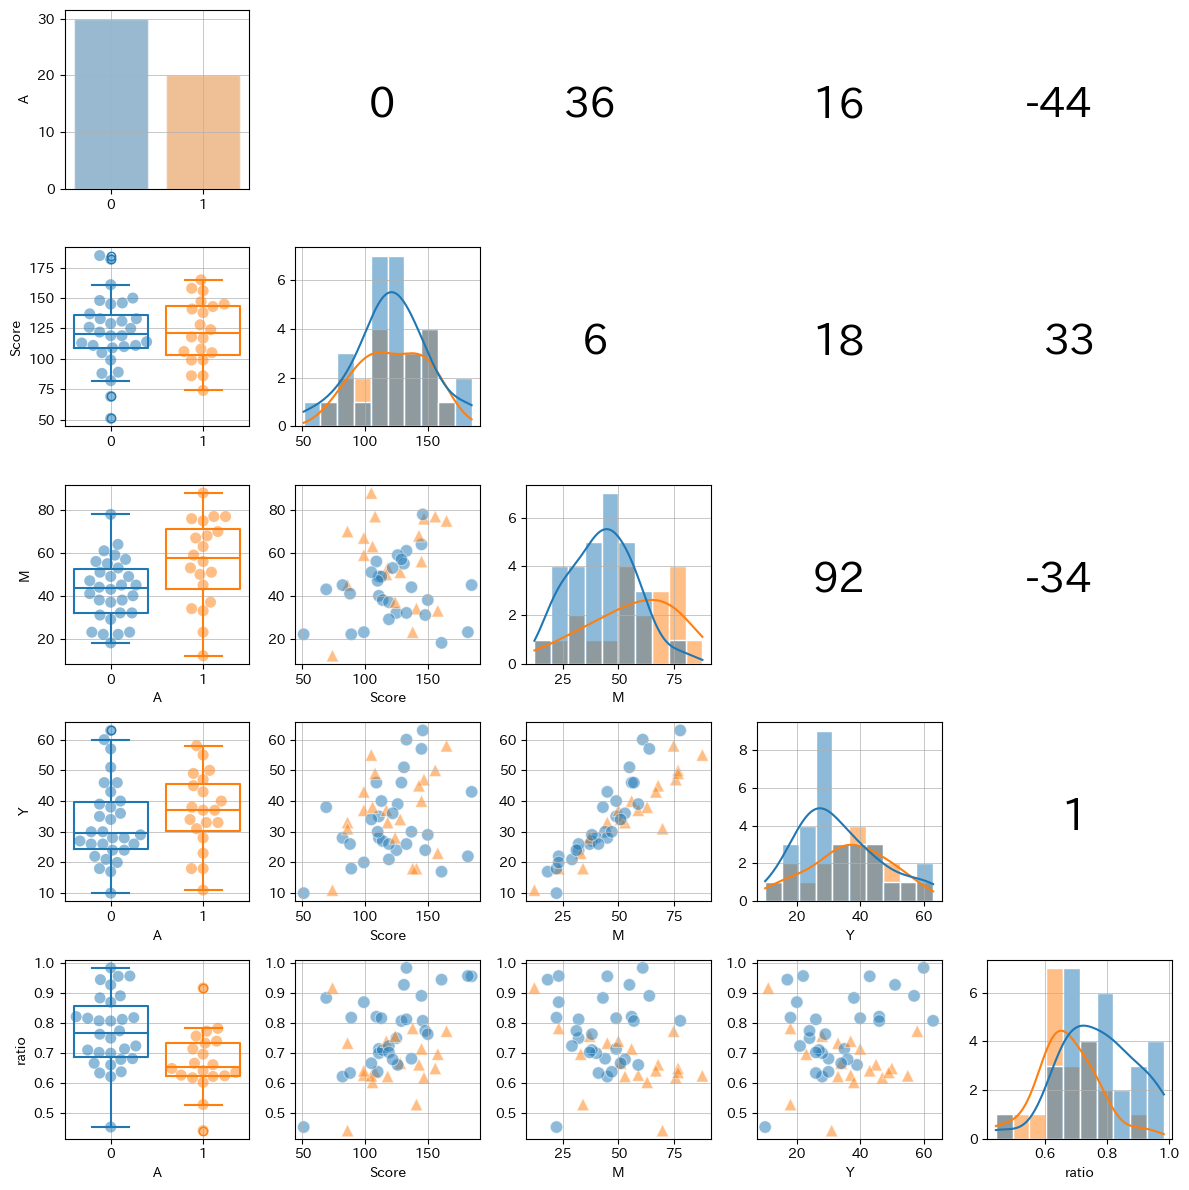

In [4]:
### 散布図行列の描画 ◆図5.6

## 描画領域の指定
fig, ax = plt.subplots(5, 5, figsize=(12, 12))
ax = ax.ravel() # １次元でaxesを指定したいので

## 番地0,0：ヒストグラムの描画（棒グラフを使用）
bar_A = data.A.value_counts().sort_index()
sns.barplot(ax=ax[0], x=bar_A.index, y=bar_A, hue=bar_A.index, palette='tab10',
            alpha=0.5, ec='white', legend=None)
ax[0].set(ylabel='A', xlabel=None)
ax[0].grid(lw=0.5)

## 番地0,1：スピアマンの順位相関係数の描画
ax[1].set_axis_off()
corr, pval = stats.spearmanr(data.A, data.Score)
ax[1].text(x=0.4, y=0.4, s=round(corr * 100), fontsize=30)

## 番地0,2：スピアマンの順位相関係数の描画
ax[2].set_axis_off()
corr, pval = stats.spearmanr(data.A, data.M)
ax[2].text(x=0.2, y=0.4, s=round(corr * 100), fontsize=30)

## 番地0,3：スピアマンの順位相関係数の描画
ax[3].set_axis_off()
corr, pval = stats.spearmanr(data.A, data.Y)
ax[3].text(x=0.3, y=0.4, s=round(corr * 100), fontsize=30)

## 番地0,4：スピアマンの順位相関係数の描画
ax[4].set_axis_off()
corr, pval = stats.spearmanr(data.A, data.ratio)
ax[4].text(x=0.2, y=0.4, s=round(corr * 100), fontsize=30)

## 番地1,0：箱ひげ図＋スウォームプロットの描画
sns.boxplot(ax=ax[5], x=data.A, y=data.Score, hue=data.A, fill=False,
            legend=None)
sns.swarmplot(ax=ax[5], x=data.A, y=data.Score, hue=data.A, size=8, alpha=0.5,
              legend=None)
ax[5].set(xlabel=None)
ax[5].grid(lw=0.5)

## 番地1,1：ヒストグラムの描画
sns.histplot(ax=ax[6], data=data, x='Score', hue='A', bins=10, kde=True,
             ec='white', legend=None)
ax[6].set(xlabel=None, ylabel=None)
ax[6].grid(lw=0.5)

## 番地1,2：スピアマンの順位相関係数の描画
ax[7].set_axis_off()
corr, pval = stats.spearmanr(data.Score, data.M)
ax[7].text(x=0.3, y=0.4, s=round(corr * 100), fontsize=30)

## 番地1,3：スピアマンの順位相関係数の描画
ax[8].set_axis_off()
corr, pval = stats.spearmanr(data.Score, data.Y)
ax[8].text(x=0.3, y=0.4, s=round(corr * 100), fontsize=30)

## 番地1,4：スピアマンの順位相関係数の描画
ax[9].set_axis_off()
corr, pval = stats.spearmanr(data.Score, data.ratio)
ax[9].text(x=0.3, y=0.4, s=round(corr * 100), fontsize=30)

## 番地2,0：箱ひげ図＋スウォームプロットの描画
sns.boxplot(ax=ax[10], x=data.A, y=data.M, hue=data.A, fill=False,
            legend=None)
sns.swarmplot(ax=ax[10], x=data.A, y=data.M, hue=data.A, size=8, alpha=0.5,
              legend=None)
ax[10].grid(lw=0.5)

## 番地2,1：散布図の描画
sns.scatterplot(ax=ax[11], data=data, x='Score', y='M', hue='A', size='A',
                style='A', markers=['o', '^'], sizes=(80, 80), alpha=0.5,
                legend=None)
ax[11].set(ylabel=None)
ax[11].grid(lw=0.5)

## 番地2,2：ヒストグラムの描画
sns.histplot(ax=ax[12], data=data, x='M', hue='A', bins=10, kde=True, ec='white',
             legend=None)
ax[12].set(ylabel=None)
ax[12].grid(lw=0.5)

## 番地2,3：スピアマンの順位相関係数の描画
ax[13].set_axis_off()
corr, pval = stats.spearmanr(data.M, data.Y)
ax[13].text(x=0.3, y=0.4, s=round(corr * 100), fontsize=30)

## 番地2,4：スピアマンの順位相関係数の描画
ax[14].set_axis_off()
corr, pval = stats.spearmanr(data.M, data.ratio)
ax[14].text(x=0.2, y=0.4, s=round(corr * 100), fontsize=30)

## 番地3,0：箱ひげ図＋スウォームプロットの描画
sns.boxplot(ax=ax[15], x=data.A, y=data.Y, hue=data.A, fill=False,
            legend=None)
sns.swarmplot(ax=ax[15], x=data.A, y=data.Y, hue=data.A, size=8, alpha=0.5,
              legend=None)
ax[15].grid(lw=0.5)

## 番地3,1：散布図の描画
sns.scatterplot(ax=ax[16], data=data, x='Score', y='Y', hue='A', size='A',
                style='A', markers=['o', '^'], sizes=(80, 80), alpha=0.5,
                legend=None)
ax[16].set(ylabel=None)
ax[16].grid(lw=0.5)

## 番地3,2：散布図の描画
sns.scatterplot(ax=ax[17], data=data, x='M', y='Y', hue='A', size='A',
                style='A', markers=['o', '^'], sizes=(80, 80), alpha=0.5,
                legend=None)
ax[17].set(ylabel=None)
ax[17].grid(lw=0.5)

## 番地3,3：ヒストグラムの描画
sns.histplot(ax=ax[18], data=data, x='Y', hue='A', bins=10, kde=True, ec='white',
             legend=None)
ax[18].set(ylabel=None)
ax[18].grid(lw=0.5)

## 番地3,4：スピアマンの順位相関係数の描画
ax[19].set_axis_off()
corr, pval = stats.spearmanr(data.Y, data.ratio)
ax[19].text(x=0.4, y=0.4, s=round(corr * 100), fontsize=30)

## 番地4,0：箱ひげ図＋スウォームプロットの描画
sns.boxplot(ax=ax[20], x=data.A, y=data.ratio, hue=data.A, fill=False,
            legend=None)
sns.swarmplot(ax=ax[20], x=data.A, y=data.ratio, hue=data.A, size=8, alpha=0.5,
              legend=None)
ax[20].grid(lw=0.5)

## 番地4,1：散布図の描画
sns.scatterplot(ax=ax[21], data=data, x='Score', y='ratio', hue='A', size='A',
                style='A', markers=['o', '^'], sizes=(80, 80), alpha=0.5,
                legend=None)
ax[21].set(ylabel=None)
ax[21].grid(lw=0.5)

## 番地4,2：散布図の描画
sns.scatterplot(ax=ax[22], data=data, x='M', y='ratio', hue='A', size='A',
                style='A', markers=['o', '^'], sizes=(80, 80), alpha=0.5,
                legend=None)
ax[22].set(ylabel=None)
ax[22].grid(lw=0.5)

## 番地4,3：散布図の描画
sns.scatterplot(ax=ax[23], data=data, x='Y', y='ratio', hue='A', size='A',
                style='A', markers=['o', '^'], sizes=(80, 80), alpha=0.5,
                legend=None)
ax[23].set(ylabel=None)
ax[23].grid(lw=0.5)

## 番地4,4：ヒストグラムの描画
sns.histplot(ax=ax[24], data=data, x='ratio', hue='A', bins=10, kde=True,
             ec='white', legend=None)
ax[24].set(ylabel=None)
ax[24].grid(lw=0.5)

plt.tight_layout();

- MとYの相関が高い：総授業回数が多ければ、出席回数も当然多い
- ratio - Score：正の相関がありそう
- ratio - A: 負の相関がありそう

## 分析の方向性
### ratio = Y/M を応答変数にすると困ること
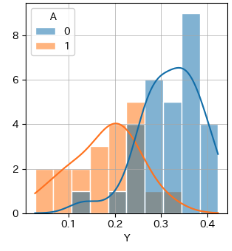　⇦ ヒストグラムを見ると、Y=1.0なんてない

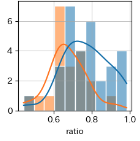　⇦ ratio≒1.0がいくつかありそう

つまり、説明変数に組み合わせによっては、出席率の予測値が1.0を超えるケースが出てくる可能性が高い。  
➡️ 予測対象は0~1.0に収まってほしい、という考えになる。つまり、ロジスティック関数を使う。

説明変数の線型結合をロジスティック関数で変換するとは？
- ロジスティック関数：単調増加関数。
- <u>よって説明変数の値が大きくなるに従ってYが単調に大きくなるという仮定が背後にある</u>

## 二項分布でモデリングする理由
- 変換後の値に正規分布ノイズを加えると、[0, 1]の範囲からまた外に出てしまう
- 授業回数（`M`）が12-88と小さめ。→ Y/Mを連続値とみなすことは難しく、正規分布を使ったモデルの当てはまりが悪そう

また、授業回数と出席回数のようなカウントデータは本来、二項分布でモデリングすることが妥当。  
(しかし、5.1のように出席率が極端な値ではなく、授業回数が大きくなれば二項分布は正規分布で十分よく近似できるから正規分布を使っても良い　　　)

## モデリング
- 出席率＝出席確率、と解釈
    - 出席確率：$q =invlogit(b_1+b_2A+b_3Score)$
- $M$と$q$をパラメータとする二項分布で$Y$が生成されたと考える
    - $Y \sim Binomial(M, q)$

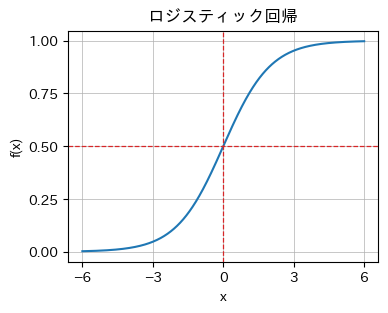

In [12]:
def logistic(x):
    return 1 / (1 + np.exp(-x))

#　x軸の値
xvals = np.linspace(-6, 6, 1001)

plt.figure(figsize=(4, 3))
ax = plt.subplot()

#　ロジスティック関数
ax.plot(xvals, logistic(xvals))
# x=0の垂直線
ax.axvline(0.0, color="tab:red", lw=0.9, ls="--")
# y=0.5の垂直線
ax.axhline(0.5, color="tab:red", lw=0.9, ls="--")
ax.set(xlabel="x", ylabel="f(x)", title="ロジスティック回帰", 
       xticks=range(-6, 7, 3), yticks=np.linspace(0, 1, 5))
ax.grid(lw=0.5)

In [13]:
# モデリング

with pm.Model() as model:
    model.add_coord("data", values=data.index, mutable=True)

    Y = pm.ConstantData("Y", value=data["Y"].values, dims="data")
    A = pm.ConstantData("A", value=data["A"].values, dims="data")
    Score = pm.ConstantData("Score", value=data["Score"].values / 200, dims="data")
    M = pm.ConstantData("M", value=data["M"].values, dims="data")

    b1 = pm.Uniform("b1", lower=-10, upper=10)
    b2 = pm.Uniform("b2", lower=-10, upper=10)
    b3 = pm.Uniform("b3", lower=-10, upper=10)

    ### 線形予測子の逆ロジット変換
    q = pm.Deterministic("q", pm.invlogit(b1+b2*A+b3*Score), dims="data")

    ### ゆうど関数
    obs = pm.Binomial("obs", n=M, p=q, observed=Y, dims="data")

model

 b1 ~ Uniform(-10, 10)
 b2 ~ Uniform(-10, 10)
 b3 ~ Uniform(-10, 10)
  q ~ Deterministic(f(b3, b1, b2))
obs ~ Binomial(<shared>, q)

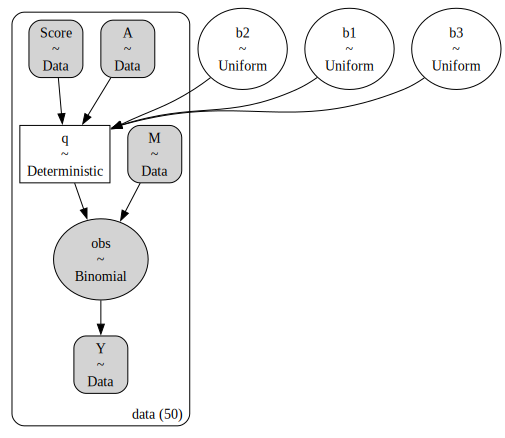

In [14]:
g = pm.model_to_graphviz(model)
display(g)

In [15]:
with model:
    idata = pm.sample(draws=1000, tune=1000, chains=4, target_accept=0.8,
                      nuts_sampler="numpyro", random_seed=1234)

Compiling.. :   0%|          | 0/2000 [00:00<?, ?it/s]





Running chain 0:   0%|          | 0/2000 [00:01<?, ?it/s]


Running chain 3: 100%|██████████| 2000/2000 [00:01<00:00, 1203.93it/s]


In [16]:
### r_hat>1.1の確認
# 設定
idata_in = idata         # idata名
threshold = 1.01         # しきい値

# しきい値を超えるR_hatの個数を表示
print((az.rhat(idata_in) > threshold).sum())

<xarray.Dataset> Size: 32B
Dimensions:  ()
Data variables:
    b1       int64 8B 0
    b2       int64 8B 0
    b3       int64 8B 0
    q        int64 8B 0


↑収束条件を満たしている

In [17]:
### 推論データの要約統計情報の表示
var_names = ['b1', 'b2', 'b3', 'q']
pm.summary(idata, hdi_prob=0.95, var_names=var_names, round_to=3)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
b1,0.091,0.234,-0.372,0.535,0.007,0.005,1236.776,1282.976,1.002
b2,-0.623,0.094,-0.798,-0.442,0.002,0.002,1658.771,1807.712,1.003
b3,1.907,0.375,1.200,2.672,0.010,0.007,1301.174,1213.865,1.001
q[0],0.678,0.025,0.628,0.727,0.001,0.000,1284.172,1579.760,1.003
q[1],0.700,0.016,0.669,0.731,0.000,0.000,1765.722,2112.851,1.001
q[2],0.783,0.012,0.759,0.804,0.000,0.000,2356.621,2581.575,1.002
q[3],0.571,0.023,0.527,0.614,0.001,0.000,1810.774,1883.297,1.002
q[4],0.726,0.019,0.690,0.762,0.000,0.000,1550.291,2015.882,1.002
q[5],0.795,0.012,0.772,0.817,0.000,0.000,2371.867,2778.117,1.001
q[6],0.759,0.013,0.735,0.784,0.000,0.000,1945.309,2188.144,1.002


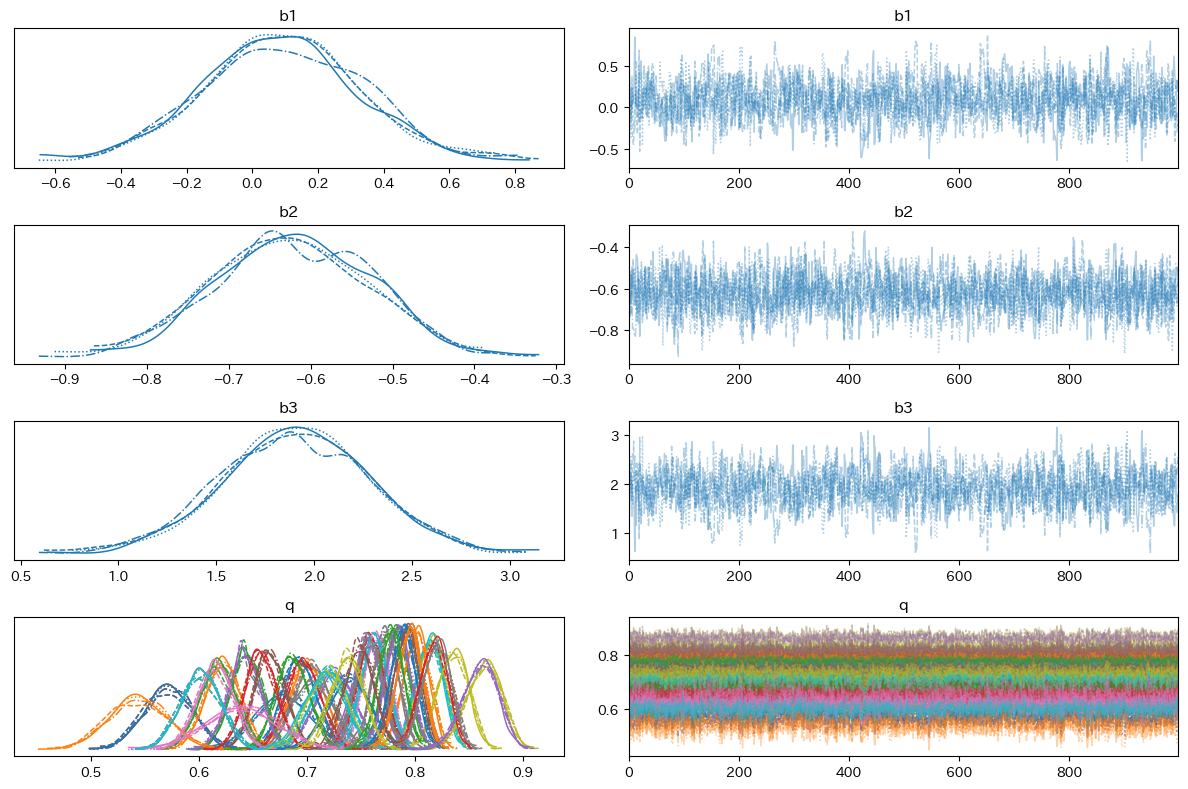

In [18]:
az.plot_trace(idata, compact=True, var_names=var_names)
plt.tight_layout()

In [19]:
### Yの事後予測分布のサンプリング
with model:
    idata.extend(pm.sample_posterior_predictive(idata, random_seed=1234))

Sampling: [obs]


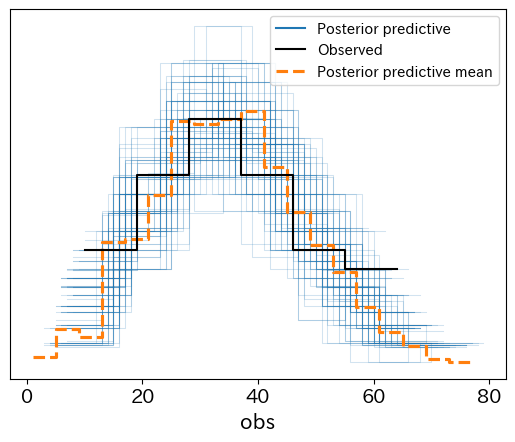

In [20]:
### ppcプロットの描画
pm.plot_ppc(idata, num_pp_samples=100);

In [21]:
  # パラメータの要約
def make_stats_df(y):
    probs = [2.5, 25, 50, 75, 97.5]
    columns = ["mean", "std"] + [str(s)+"%" for s in probs]
    quantiles = pd.DataFrame(np.percentile(y, probs, axis=0).T, index=y.columns)
    tmp_df = pd.concat([y.mean(axis=0), y.std(axis=0), quantiles], axis=1)
    tmp_df.columns = columns
    return tmp_df

vars = ["b1", "b2", "b3"]
param_samples = idata.posterior[vars].to_dataframe()
# 上記データフレームを統計量算出関数に与えて事後統計量データフレームを作成
params_stats_df = make_stats_df(param_samples)
# 事後統計量データフレームの表示
display(params_stats_df.round(2))

,mean,std,2.5%,25%,50%,75%,97.5%
b1,0.09,0.23,-0.36,-0.06,0.09,0.25,0.55
b2,-0.62,0.09,-0.81,-0.69,-0.62,-0.56,-0.45
b3,1.91,0.38,1.15,1.66,1.91,2.16,2.63


↑ `b1`を見ると、95%区間が[-0.36, 0.55]になってる。b1の寄与は明確な正負を断言できなさそう

In [24]:
### オッズを求めてみる ◆テキスト68ページあたりの議論

# アルバイト好き区分（# 好き:1, そうでもない:0）と学問興味スコアを設定します
arbeit = 0      
score = 150

# オッズ計算関数の定義
def calc_odds(a, score, b1, b2, b3):
    return np.exp(b1 + b2 * a + b3 * score / 200)

# パラメータの事後分布サンプルの事後平均を取得
b1_mean = params_stats_df.loc['b1', 'mean']
b2_mean = params_stats_df.loc['b2', 'mean']
b3_mean = params_stats_df.loc['b3', 'mean']
print(f"{b1_mean=:.3f}")
print(f"{b2_mean=:.3f}")
print(f"{b3_mean=:.3f}")

# オッズを計算する
print(f'オッズ: {calc_odds(arbeit, score, b1_mean, b2_mean, b3_mean):.3f}')

b1_mean=0.091
b2_mean=-0.623
b3_mean=1.907
オッズ: 4.579


### 実測値と予測値のプロット
一番大切な、キーチャート

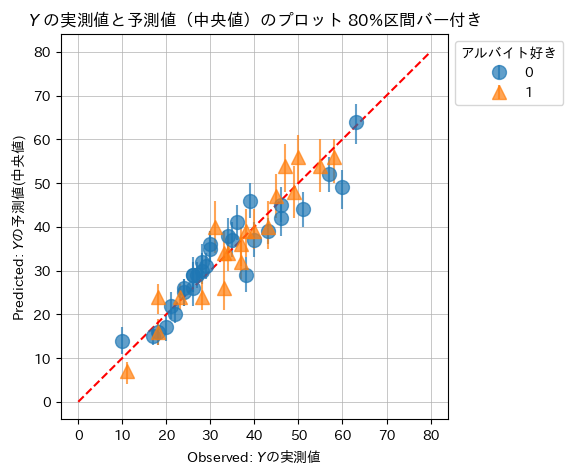

In [28]:
### 実測値と予測値のプロット
## y_predの個人別の中央値と80%区間算出
y_pred_samples = idata.posterior_predictive.obs.stack(sample=("chain", "draw")).data
# パーセンタイル計算
y_pred_quantile_df = pd.DataFrame(
    np.quantile(y_pred_samples, q=[0.1, 0.5, 0.9], axis=1).T,
    columns=["10%", "median", "90%"]
)
# 実測値dataと予測値y_pred_dfを結合
y_pred_df = pd.concat([data, y_pred_quantile_df], axis=1)
# 区間予測の幅計算
y_pred_df["err_lower"] = y_pred_df["median"] - y_pred_df["10%"]
y_pred_df["err_upper"] = y_pred_df["90%"] - y_pred_df["median"]
# アルバイト=0/1に分離
y_pred_A0 = y_pred_df.query("A==0")
y_pred_A1 = y_pred_df.query("A==1")

## 描画処理
# 描画領域の指定
plt.figure(figsize=(5, 5))
ax = plt.subplot()
# アルバイト0の描画（エラーバー付き散布図）
ax.errorbar(y_pred_A0['Y'], y_pred_A0['median'],
            yerr=[y_pred_A0['err_lower'], y_pred_A0['err_upper']],
            color='tab:blue', alpha=0.7, marker='o', ms=10, linestyle='none',
            label='0')
# アルバイト1の描画（エラーバー付き散布図）
ax.errorbar(y_pred_A1['Y'], y_pred_A1['median'],
            yerr=[y_pred_A1['err_lower'], y_pred_A1['err_upper']],
            color='tab:orange', alpha=0.7, marker='^', ms=10, linestyle='none',
            label='1')
# 赤い対角線の描画
ax.plot([0, 80], [0, 80], color='red', ls='--')
# 修飾
ax.set(xlabel='Observed: $Y$の実測値', ylabel='Predicted: $Y$の予測値(中央値)',
       title='$Y$ の実測値と予測値（中央値）のプロット 80%区間バー付き')
ax.legend(title='アルバイト好き', bbox_to_anchor=(1, 1))
ax.grid(lw=0.5);

↑線形回帰モデルを使う場合は、いつもこの確認をして良さそう。予測値＝実測値になっているか？を確認するものだから。  
今回も、系統的な偏りはないので問題はなさそう。